Base de dados Kaggle: https://www.kaggle.com/laotse/credit-risk-dataset

Objetivo: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def identify_outlier(df):
# Função destinada a identificar quais os outliers da coluna'
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  if outliers.empty:
    print('Não há outliers na coluna selecionada')
  else:
    return outliers

In [3]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
linha, coluna = df.shape
df.shape

(32581, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [8]:
'''
Dicionário de Dados
0   person_age IDADE int64  
1   person_income RENDA int64  
2   person_home_ownership TIPO DE PROPRIEDADE DA CASA object
3   person_emp_length TEMPO DE TRABALHO float64
4   loan_intent MOTIVO DO EMPRÉSTIMO  object 
5   loan_grade GRAU DO EMPRÉSTIMO  object 
6   loan_amnt VALOR DO EMPRÉSTIMO int64  
7   loan_int_rate TAXA DE JUROS float64
8   loan_status STATUS DO EMPRÉSTIMO (0 is non default 1 is default) int64  
9   loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA float64
10  cb_person_default_on_file PADRÃO HISTÓRICO object 
11  cb_person_cred_hist_length SCORE DE CRÉDITO int64 
'''

'\nDicionário de Dados\n0   person_age IDADE int64  \n1   person_income RENDA int64  \n2   person_home_ownership TIPO DE PROPRIEDADE DA CASA object\n3   person_emp_length TEMPO DE TRABALHO float64\n4   loan_intent MOTIVO DO EMPRÉSTIMO  object \n5   loan_grade GRAU DO EMPRÉSTIMO  object \n6   loan_amnt VALOR DO EMPRÉSTIMO int64  \n7   loan_int_rate TAXA DE JUROS float64\n8   loan_status STATUS DO EMPRÉSTIMO (0 is non default 1 is default) int64  \n9   loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA float64\n10  cb_person_default_on_file PADRÃO HISTÓRICO object \n11  cb_person_cred_hist_length SCORE DE CRÉDITO int64 \n'

# Person_age


---

Excluídos 5 registros > 100


---

df -> df_v2



---

A idade média dos clientes é de 27.7 e a mediana é de 26.

In [9]:
df.person_age.nunique()

58

In [10]:
df.person_age.unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [11]:
df['person_age'].min()

20

In [12]:
df[df['person_age'] > 100].shape # São 5 registros de clientes com idade acima de 100. Serão desconsiderados.

(5, 12)

In [13]:
df[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [14]:
df_v2 = df[df['person_age']<= 100]

In [15]:
df_v2.shape

(32576, 12)

In [16]:
df_v2['person_age'].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

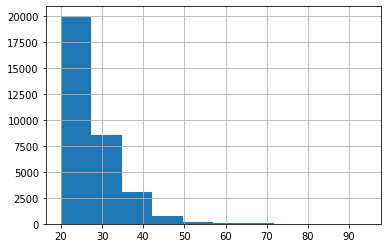

In [17]:
df_v2['person_age'].hist()

# Person_income
Renda


---


Coluna apresenta outliers, mas, em regra, serão mantidos na base de dados. Afinal, não é uma premissa do modelo ser incapaz de avaliar clientes com alta renda.


---


Especialmente o ID 32297, que apresenta o valor máximo do atributo (R$ 6.000.000), será excluído devido à idade 144, não pela renda.


---

A renda média dos clientes é de 65,882.14 e a mediana 55,000

In [18]:
df_v2['person_income'].nunique()

4294

In [19]:
df_v2['person_income'].unique()

array([  59000,    9600,   65500, ...,  720000, 1900000,    4888])

In [20]:
df_v2['person_income'].describe().round(2)

count      32576.00
mean       65882.14
std        52534.99
min         4000.00
25%        38500.00
50%        55000.00
75%        79200.00
max      2039784.00
Name: person_income, dtype: float64

In [21]:
identify_outlier(df_v2['person_income'])

15        500000
20        162500
33        306000
34        300000
42        300000
          ...   
32544     780000
32546    1900000
32551     780000
32562     160000
32579     150000
Name: person_income, Length: 1481, dtype: int64

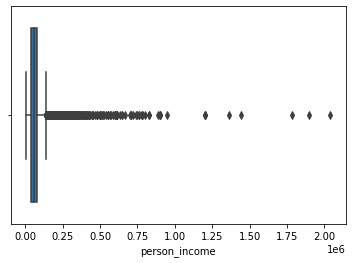

In [22]:
sns.boxplot(x='person_income', data=df_v2, fliersize=5)

In [23]:
df_v2.loc[df['person_income'] == df_v2['person_income'].max()]
#Registro já será desconsiderado devido à idade.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15


#Person_home_ownership


---

A maioria dos clientes mora em casa alugada (50.47) ou financiada (41.26)

In [24]:
df_v2['person_home_ownership'].nunique()

4

In [25]:
df_v2['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [26]:
df_v2_gb_ownership = df_v2.groupby('person_home_ownership')

In [27]:
df_v2_gb_ownership.size().sort_values(ascending=False)

person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
dtype: int64

In [28]:
sum_df_v2_gb_ownership = df_v2_gb_ownership.size().sum()

In [29]:
100 * 16443 / sum_df_v2_gb_ownership

50.47581041257367

In [30]:
100 * 13442 / sum_df_v2_gb_ownership

41.2635068762279

#person_emp_length


---

Apresenta dados faltantes


---

Apresenta 2 registros de pessoas que supostamente tem tempo de serviço de 123 anos. Serão retiradas da base de dados.

---

df_v2 => df_v3

In [31]:
df_v2['person_emp_length'].nunique()

36

In [32]:
df_v2['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [33]:
df_v2['person_emp_length'].describe()

count    31681.000000
mean         4.789527
std          4.142706
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [34]:
df_v2['person_emp_length'].isnull().sum()

895

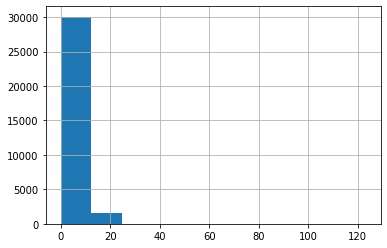

In [35]:
df_v2['person_emp_length'].hist()

In [36]:
df_v2.shape

(32576, 12)

In [37]:
df_3teste = df_v2.loc[df_v2['person_emp_length'] >= 50]

In [38]:
df_3teste.shape

(2, 12)

In [39]:
df_v3_perda = df_v2.loc[df_v2['person_emp_length'] < 50]

In [40]:
len(df_v3_perda)

31679

## Usando o df_v2, identifico que há 2 registros com tempo de trabalho acima de 50 anos, exatamente 123 anos de trabalho. Eles serão excluídos do dataset. Contudo, ao atribuir apenas os registros com tempo de serviço <= 50 anos, o dataset passa a ter -879 registros.
## Isso ocorre porque quando se filtra um campo por número, os na não são levados para o filtro.
## Utilizarei o drop para fazer a exclusão correta.

In [41]:
df_v2.loc[df_v2['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [42]:
df_v3 = df_v2.drop(index=[0,210])

In [43]:
df_v3.shape

(32574, 12)

In [44]:
df_v3['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

## Tratando os NA da coluna


---

Considerando que os NA representam 2,75% da coluna (pouco representativo), será atribuída a estes registros a mediana do tempo de serviço dos demais registros.

In [45]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

2.75

In [46]:
df_v3['person_emp_length'].fillna(value=df_v3['person_emp_length'].median(), inplace=True)

In [47]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

0.0

#loan_intent MOTIVO DO EMPRÉSTIMO

In [48]:
df_v3['loan_intent'].nunique()

6

In [49]:
df_v3['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [50]:
df_v3_gb_intent = df_v3.groupby("loan_intent")[['person_age', 'loan_amnt']]

In [51]:
df_v3_gb_intent.count().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
EDUCATION,6451,6451
MEDICAL,6071,6071
VENTURE,5716,5716
PERSONAL,5519,5519
DEBTCONSOLIDATION,5212,5212
HOMEIMPROVEMENT,3605,3605


In [52]:
df_v3_gb_intent.sum().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
EDUCATION,171306,61165325
MEDICAL,169976,56214925
VENTURE,157376,54764825
PERSONAL,155573,52816800
DEBTCONSOLIDATION,143884,50008550
HOMEIMPROVEMENT,104785,37349675


In [53]:
(df_v3_gb_intent.sum() / df_v3_gb_intent.count()).sort_values(by='loan_amnt', ascending=False).round(2)

,person_age,loan_amnt
loan_intent,,
HOMEIMPROVEMENT,29.07,10360.52
DEBTCONSOLIDATION,27.61,9594.89
VENTURE,27.53,9580.97
PERSONAL,28.19,9569.99
EDUCATION,26.55,9481.53
MEDICAL,28.00,9259.58


#loan_grade GRAU DO EMPRÉSTIMO  object 

In [54]:
df_v3.loan_grade.nunique()

7

In [55]:
df_v3.loan_grade.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [56]:
df_v3_gb_grade = df_v3.groupby('loan_grade')[['person_age', 'loan_amnt']]

In [57]:
df_v3_gb_grade.count()

,person_age,loan_amnt
loan_grade,,
A,10776,10776
B,10448,10448
C,6456,6456
D,3625,3625
E,964,964
F,241,241
G,64,64


#loan_amnt VALOR DO EMPRÉSTIMO

In [58]:
df_v3.loan_amnt.nunique()

753

In [59]:
df_v3.loan_amnt.describe()

count    32574.000000
mean      9588.018051
std       6320.249598
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# loan_int_rate TAXA DE JUROS 

In [60]:
df_v3.loan_int_rate.nunique()

348

In [61]:
df_v3.loan_int_rate.describe()

count    29459.000000
mean        11.011529
std          3.240497
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [62]:
df_v3_gb_rate = df_v3.groupby(by=['loan_intent', 'loan_grade'])['loan_int_rate', 'loan_amnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [63]:
df_v3_gb_rate.sum().round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                11729.26   14977750
                  B                15968.56   16432775
                  C                12562.17    9534525
                  D                 8401.44    6430575
                  E                 2143.04    1810950
                  F                  687.18     630825
                  G                  162.66     191150
EDUCATION         A                14637.81   18472075
                  B                20110.33   20291900
                  C                16352.18   12064450
                  D                 9170.78    7152575
                  E                 2892.78    2361550
                  F                  736.14     659275
                  G                  180.70     163500
HOMEIMPROVEMENT   A                 7521.90   10006250
                  B                11099.33   12083900
                  C                 8439.99    6954600
                  D                 6840.14    5546300
                  E                 2240.72    2022725
                  F                  528.22     540025
                  G                  181.49     195875
MEDICAL           A                12890.07   16261675
                  B                19489.34   19005075
                  C                14936.50   10864875
                  D                 9247.46    6995175
                  E                 2630.07    2158625
                  F                  872.50     746500
                  G                  223.18     183000
PERSONAL          A                12142.50   15758325
                  B                18069.80   17683125
                  C                12740.07    9928275
                  D                 9101.18    6963750
                  E                 2344.03    1845400
                  F                  519.83     442575
                  G                  198.92     195350
VENTURE           A                12692.38   16531675
                  B                18543.77   18919625
                  C                13408.31   10146600
                  D                 8130.82    6215975
                  E                 2734.69    2251625
                  F                  638.49     527675
                  G                  247.89     171650

## Analisando os dados faltantes: Há predominância de dados faltantes em algum subgrupo do dataset?

---

person_home_ownership   
loan_intent   
loan_grade   
loan_status   
cb_person_default_on_file   
cb_person_cred_hist_length   

In [64]:
df_v3['isnull_loan_int_rate'] = 0

In [65]:
# if df_v3['loan_int_rate']:
#     df_v3['isnull_loan_int_rate'] = 1
# else:
#     df_v3['isnull_loan_int_rate'] = 0

In [66]:
# df_v3['isnull_loan_int_rate'].sum()

In [67]:
# df_v3_gb_homeow = df_v3.groupby('person_home_ownership')

In [68]:
# df_v3_gb_homeow.isnull().sum()

In [69]:
# df_v3_gb_rate.mean().round(2)

# loan_status STATUS DO EMPRÉSTIMO


---

(0 is non default 1 is default)

In [70]:
df_v3.loan_status.nunique()

2

In [71]:
df_v3.loan_status.unique()

array([0, 1])

In [72]:
df_v3.loan_status.value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

# loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA

In [73]:
df_v3.loan_percent_income.nunique()

77

In [74]:
df_v3.loan_percent_income.describe().round(9)

count    32574.000000
mean         0.170202
std          0.106755
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [75]:
df_test_percent = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [76]:
df_test_percent_min = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [77]:
df_test_percent_max = df_v3.loc[df_v3['loan_percent_income'] > 0.7,['loan_amnt', 'person_income', 'loan_percent_income']]

In [78]:
df_test_percent_concat = pd.concat([df_test_percent_min, df_test_percent_max])

In [79]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income
17834,2000,948000,0.00
18917,1800,510000,0.00
27877,2500,522000,0.00
30049,8450,2039784,0.00
31916,1000,780000,0.00
31922,6600,1362000,0.00
31924,6400,1440000,0.00
32546,1500,1900000,0.00
460,13000,18000,0.72
571,15000,19500,0.77


In [80]:
df_test_percent_concat['test_column'] = (df_test_percent_concat['loan_amnt'] / df_test_percent_concat['person_income']).round(2)

In [81]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income,test_column
17834,2000,948000,0.00,0.00
18917,1800,510000,0.00,0.00
27877,2500,522000,0.00,0.00
30049,8450,2039784,0.00,0.00
31916,1000,780000,0.00,0.00
31922,6600,1362000,0.00,0.00
31924,6400,1440000,0.00,0.00
32546,1500,1900000,0.00,0.00
460,13000,18000,0.72,0.72
571,15000,19500,0.77,0.77


# cb_person_default_on_file PADRÃO HISTÓRICO

In [82]:
df_v3['cb_person_default_on_file'].nunique()

2

In [83]:
df_v3['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [84]:
df_v3['cb_person_default_on_file'].value_counts()

N    26830
Y     5744
Name: cb_person_default_on_file, dtype: int64

# cb_person_cred_hist_length SCORE DE CRÉDITO

In [85]:
df_v3['cb_person_cred_hist_length'].nunique()

29

In [86]:
df_v3['cb_person_cred_hist_length'].unique()

array([ 2,  3,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 28,
       27, 22, 19, 29, 23, 26, 20, 21, 30, 25, 24, 18])

In [87]:
df_v3['cb_person_cred_hist_length'].value_counts()

2     5964
3     5940
4     5923
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
30      22
23      22
22      22
27      22
19      21
21      20
18      19
25      17
26      16
29      14
Name: cb_person_cred_hist_length, dtype: int64

# Separar df sem dados faltantes e apenas com dados faltantes


---

df_3 -> df_4

In [88]:
df_v3.shape 

(32574, 13)

In [89]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
 12  isnull_loan_int_rate        32574 non-null  int64  
dtypes: float64(3), int64(6), object

In [90]:
df_v4 = df_v3.drop_duplicates()

In [91]:
df_v4.shape # 165 duplicatas

(32409, 13)

In [92]:
df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32409 entries, 1 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32409 non-null  int64  
 1   person_income               32409 non-null  int64  
 2   person_home_ownership       32409 non-null  object 
 3   person_emp_length           32409 non-null  float64
 4   loan_intent                 32409 non-null  object 
 5   loan_grade                  32409 non-null  object 
 6   loan_amnt                   32409 non-null  int64  
 7   loan_int_rate               29315 non-null  float64
 8   loan_status                 32409 non-null  int64  
 9   loan_percent_income         32409 non-null  float64
 10  cb_person_default_on_file   32409 non-null  object 
 11  cb_person_cred_hist_length  32409 non-null  int64  
 12  isnull_loan_int_rate        32409 non-null  int64  
dtypes: float64(3), int64(6), object

In [93]:
df_v4.dropna(how='any', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_v4.shape # 3.094 valores faltantes (taxa de juros)

(29315, 13)

## Analisando os dados faltantes em busca de um padrão

In [106]:
df_vFaltantes = df_v3.loc[pd.isna(df_v3['loan_int_rate'])]

In [110]:
df_vFaltantes_gpby_grade = df_vFaltantes.groupby(df_vFaltantes['loan_grade'])

In [111]:
df_vFaltantes_gpby_grade.count()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,isnull_loan_int_rate
loan_grade,,,,,,,,,,,,
A,1003,1003,1003,1003,1003,1003,0,1003,1003,1003,1003,1003
B,1055,1055,1055,1055,1055,1055,0,1055,1055,1055,1055,1055
C,630,630,630,630,630,630,0,630,630,630,630,630
D,312,312,312,312,312,312,0,312,312,312,312,312
E,83,83,83,83,83,83,0,83,83,83,83,83
F,27,27,27,27,27,27,0,27,27,27,27,27
G,5,5,5,5,5,5,0,5,5,5,5,5


In [112]:
df_vFaltantes_gpby_motivo = df_vFaltantes.groupby(df_vFaltantes['loan_intent'])

In [113]:
df_vFaltantes_gpby_motivo.count()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,isnull_loan_int_rate
loan_intent,,,,,,,,,,,,
DEBTCONSOLIDATION,509,509,509,509,509,509,0,509,509,509,509,509
EDUCATION,599,599,599,599,599,599,0,599,599,599,599,599
HOMEIMPROVEMENT,315,315,315,315,315,315,0,315,315,315,315,315
MEDICAL,620,620,620,620,620,620,0,620,620,620,620,620
PERSONAL,507,507,507,507,507,507,0,507,507,507,507,507
VENTURE,565,565,565,565,565,565,0,565,565,565,565,565


In [114]:
df_vFaltantes_gpby_ownership = df_vFaltantes.groupby(df_vFaltantes['person_home_ownership'])

In [115]:
df_vFaltantes_gpby_ownership.count()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,isnull_loan_int_rate
person_home_ownership,,,,,,,,,,,,
MORTGAGE,1322,1322,1322,1322,1322,1322,0,1322,1322,1322,1322,1322
OTHER,13,13,13,13,13,13,0,13,13,13,13,13
OWN,228,228,228,228,228,228,0,228,228,228,228,228
RENT,1552,1552,1552,1552,1552,1552,0,1552,1552,1552,1552,1552


# Outliers

In [95]:
df_v4.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'isnull_loan_int_rate'],
      dtype='object')

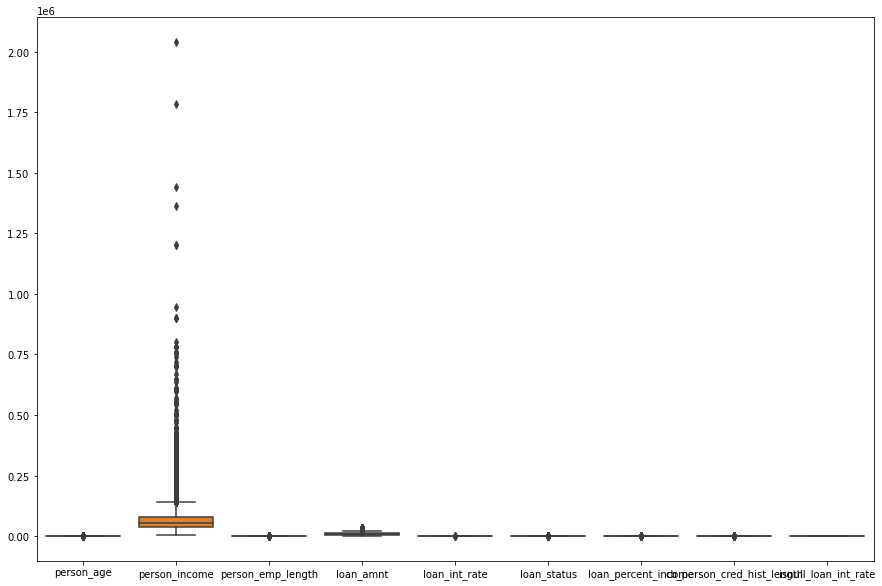

In [96]:
# Sem coluna person_income
plt.figure(figsize=(15,10))
sns.boxplot(data=df_v4, fliersize=5)

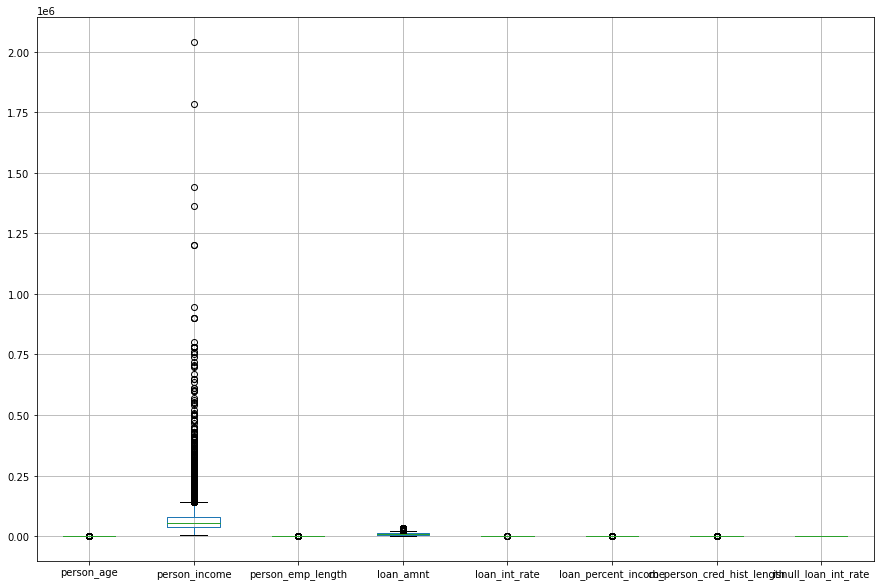

In [97]:
plt.figure(figsize=(15,10))
df_v4.boxplot(column=['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'isnull_loan_int_rate'])

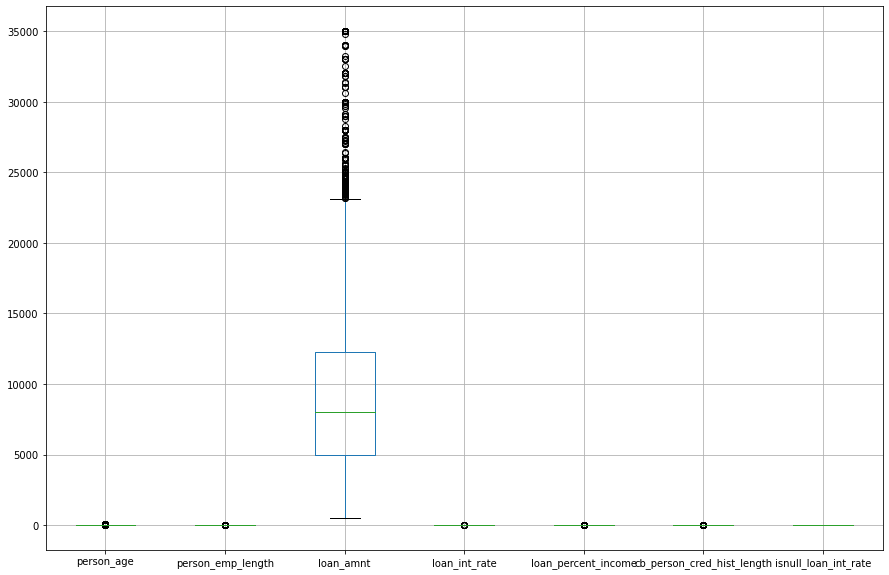

In [98]:
plt.figure(figsize=(15,10))
df_v4.boxplot(column=['person_age', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'isnull_loan_int_rate'])

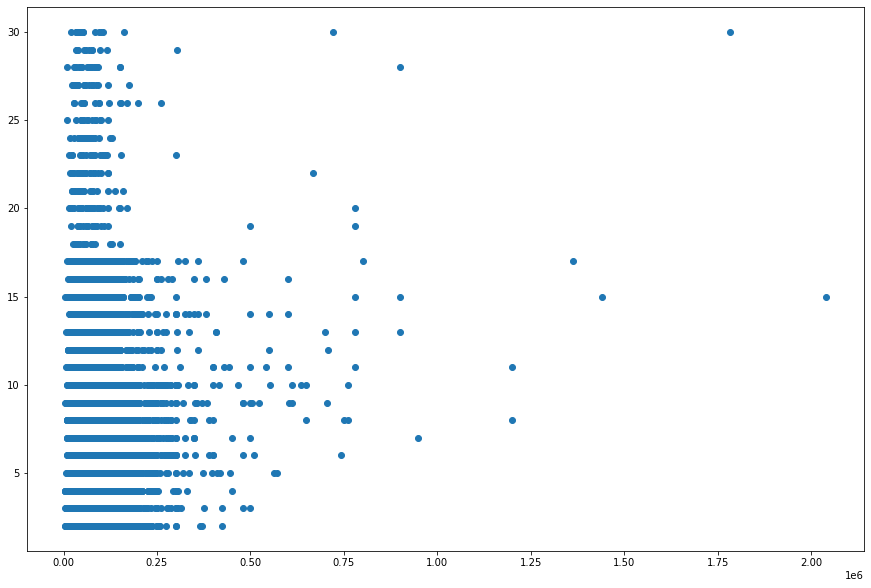

In [99]:
# Gráfico de Dispersão plt
plt.figure(figsize=(15,10))
plt.scatter(x=df_v4['person_income'], y=df_v4['cb_person_cred_hist_length'])

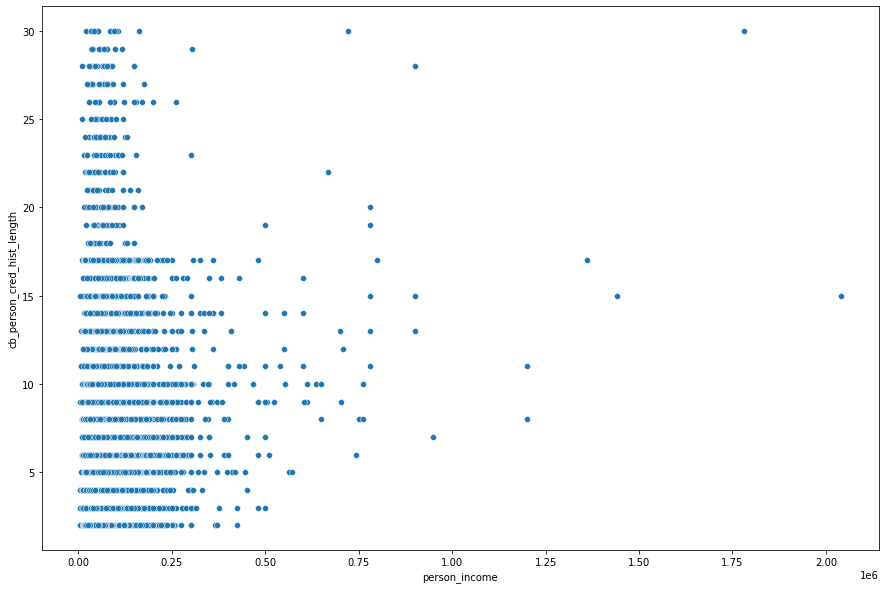

In [100]:
# Gráfico de Dispersão sns
plt.figure(figsize=(15,10))
sns.scatterplot(x='person_income', y='cb_person_cred_hist_length', data=df_v4)